In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [15]:
img = np.asarray(Image.open('house.tiff'))

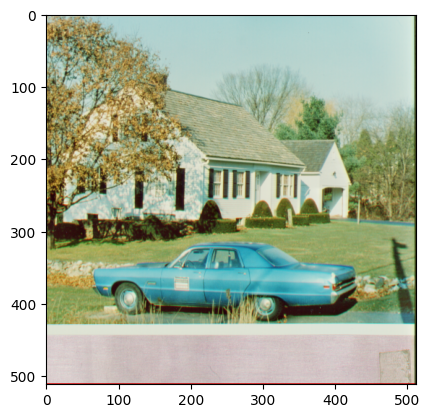

In [16]:
plt.imshow(img, cmap='gray')

In [17]:
img

array([[[  2,   0, 166],
        [211, 227, 214],
        [ 70, 227, 214],
        ...,
        [222, 237, 213],
        [222, 225, 199],
        [222, 186, 170]],

       [[ 72,   0,  61],
        [223, 226, 214],
        [223, 227, 214],
        ...,
        [194, 206, 170],
        [ 60,  76,  43],
        [ 58,  67,  45]],

       [[ 71,   0,  58],
        [218, 220, 207],
        [218, 222, 210],
        ...,
        [168, 195, 158],
        [ 61,  72,  47],
        [ 57,  65,  42]],

       ...,

       [[ 84,   0,  77],
        [216, 202, 203],
        [215, 203, 204],
        ...,
        [200, 199, 185],
        [ 71,  83,  23],
        [ 66,  73,  38]],

       [[ 84,   0,  78],
        [217, 200, 199],
        [219, 202, 202],
        ...,
        [207, 197, 187],
        [ 74,  83,  25],
        [ 65,  74,  38]],

       [[ 82,   0,   0],
        [212,   0,   0],
        [216,   0,   0],
        ...,
        [207,   0,   0],
        [ 73,   0,   0],
        [ 68,   0,   0]]

In [18]:
W,H,L = img.shape

In [19]:
W,H,L

(512, 512, 3)

In [20]:
message = input()
message += '[END]'
message = message.encode('ascii')
message_bits = ''.join([format(i,'08b') for i in message])

In [21]:
message

b'madhu[END]'

In [22]:
message_bits

'01101101011000010110010001101000011101010101101101000101010011100100010001011101'

In [23]:
img = img.flatten()
for idx, bit in enumerate(message_bits):
    val = img[idx]
    val = bin(val)
    val = val[:-1] + bit
    img[idx] = int(val,2)
encoded_img = img.reshape((W,H,L))

In [24]:
encoded_img

array([[[  2,   1, 167],
        [210, 227, 215],
        [ 70, 227, 214],
        ...,
        [222, 237, 213],
        [222, 225, 199],
        [222, 186, 170]],

       [[ 72,   0,  61],
        [223, 226, 214],
        [223, 227, 214],
        ...,
        [194, 206, 170],
        [ 60,  76,  43],
        [ 58,  67,  45]],

       [[ 71,   0,  58],
        [218, 220, 207],
        [218, 222, 210],
        ...,
        [168, 195, 158],
        [ 61,  72,  47],
        [ 57,  65,  42]],

       ...,

       [[ 84,   0,  77],
        [216, 202, 203],
        [215, 203, 204],
        ...,
        [200, 199, 185],
        [ 71,  83,  23],
        [ 66,  73,  38]],

       [[ 84,   0,  78],
        [217, 200, 199],
        [219, 202, 202],
        ...,
        [207, 197, 187],
        [ 74,  83,  25],
        [ 65,  74,  38]],

       [[ 82,   0,   0],
        [212,   0,   0],
        [216,   0,   0],
        ...,
        [207,   0,   0],
        [ 73,   0,   0],
        [ 68,   0,   0]]

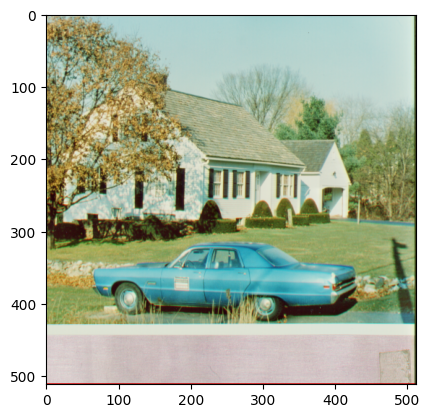

In [30]:
form_img = Image.fromarray(encoded_img)
plt.imshow(form_img, cmap='gray')
form_img.save('modifiedhouse.tiff')

In [26]:
decode_img = encoded_img.flatten()

In [27]:
decode_img

array([  2,   1, 167, ...,  68,   0,   0], dtype=uint8)

In [28]:
msg = ""
idx = 0
while msg[-5:] != '[END]':
    bits = [bin(i)[-1] for i in img[idx:idx+8]]
    bits = ''.join(bits)
    msg += chr(int(bits,2))
    idx+=8
    if idx > img.shape[0]:
        print("No hidden message")
        break

In [29]:
msg

'madhu[END]'